### Task 1

Implement a neural network from scratch using only Numpy to handle matrix operations. Your task involves manually coding both the training and inference stages for a simple neural network, applying it to the provided dataset "neural network data.csv". Specifically, you are to develop a Stochastic Gradient Descent (SGD) algorithm without relying on external libraries beyond Numpy’s core functionalities, doing it all manually by yourself.

After training your custom-built neural network on the given dataset, evaluate its performance by reporting the accuracy in terms of the Root Mean Square Error (RMSE).

### Task 2


Suppose your dataset is best described by the function 

$$ f(x_1, x_2) = || \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - \begin{bmatrix} b_1 \\ b_2 \end{bmatrix} ||_2^2 $$

Given this, consider how you could modify both the output layer’s architecture and the training loss function of your neural network to enhance its predictive accuracy. After making these modifications, evaluate the performance improvement by comparing the new results against the previously obtained RMSE metrics in Task 1.


### Data Preprocessing:
The code first preprocesses the data. It reads a CSV file containing input features and target values. Then it standardizes the input features by subtracting the mean and dividing by the standard deviation. This is done to ensure that all features have a similar scale, which helps in training the neural network.

1. Subtract the mean: 
$$ X_{\text{mean}} = \frac{1}{n}\sum_{i=1}^{n} X_i $$

2. Divide by standard deviation: 
$$ X_{\text{std}} = \frac{X - X_{\text{mean}}}{\sigma} $$


### Neural Network Architecture:
The neural network architecture consists of an input layer, a hidden layer with ReLU activation, and an output layer.

1. **Forward Pass:**
   - Input to Hidden Layer: 
   $$ \text{hidden_output} = X \cdot W_{\text{input_hidden}} + b_{\text{hidden}} $$
   - Hidden Layer Activation (ReLU): 
   $$ \text{hidden_activation} = \max(0, \text{hidden_output}) $$
   - Hidden to Output Layer: 
   $$ \text{output} = \text{hidden_activation} \cdot W_{\text{hidden_output}} + b_{\text{output}} $$

2. **ReLU Function:**
   $$ \text{ReLU}(x) = \max(0, x) $$

3. **Loss Calculation:**
   The Mean Squared Error (MSE) loss function is used.
   $$ \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{predicted}} - y_{\text{true}})^2 $$

4. **Backward Pass (Gradient Descent):**
   Gradients are computed and weights are updated to minimize the loss using gradient descent.
   - Output Layer Error: 
   $$ \text{output_error} = \frac{2}{n} \times (y_{\text{predicted}} - y_{\text{true}}) $$
   - Hidden Layer Error: 
   $$ \text{hidden_error} = \text{output_error} \cdot W_{\text{hidden_output}}^T $$
   - Update Weights: 
     $$ W_{\text{input_hidden}} -= \text{learning_rate} \times \frac{\partial \text{Loss}}{\partial W_{\text{input_hidden}}} $$
     $$ W_{\text{hidden\_output}} -= \text{learning_rate} \times \frac{\partial \text{Loss}}{\partial W_{\text{hidden_output}}} $$
   - Update Biases:
     $$ b_{\text{hidden}} -= \text{learning_rate} \times \frac{\partial \text{Loss}}{\partial b_{\text{hidden}}} $$
     $$ b_{\text{output}} -= \text{learning_rate} \times \frac{\partial \text{Loss}}{\partial b_{\text{output}}} $$

### Inference:
Finally, the trained model is used for inference, and Root Mean Squared Error (RMSE) is calculated to evaluate the model's performance.
$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{\text{predicted}} - y_{\text{true}})^2} $$

This explanation provides a mathematical understanding of the code's operations in terms of data preprocessing, neural network architecture, training (including forward and backward passes), and evaluation.


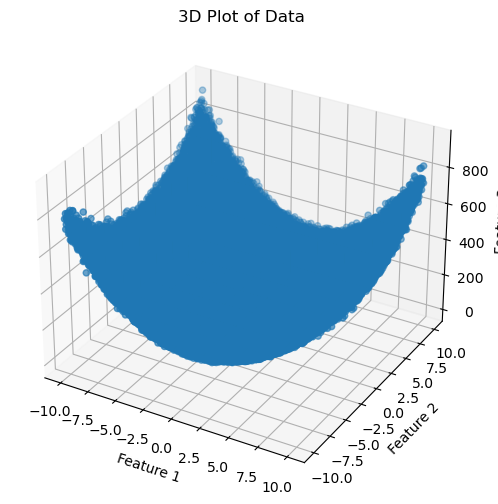

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the data
data = pd.read_csv("neural_network_data.csv")

# Plot the data in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Plot of Data')
plt.show()


In [3]:
# X will contain the feature values of your dataset.
# y will contain the target variable values of your dataset, 
# reshaped to a 2D array with one column.
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values.reshape(-1, 1)  # Target
# Normalization of Features: 
#    Adjusts the scale of features to make them comparable, 
#    improving model performance.

# Adding Bias Term: 
#    Introduces an intercept term in the model, enabling it 
#    to make predictions even when all features are zero.


X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.hstack((X, np.ones((X.shape[0], 1))))
'''
Setting Random Seed: Ensures consistent random number generation for 
reproducible results.

Defining Sizes: Determines the dimensions of the neural network
layers based on input features, hidden layer size, and output size.

Initializing Weights and Biases: Assigns random weights for 
connections between layers and initializes biases to zeros, 
setting up the initial parameters of the neural network 
before training.

'''

np.random.seed(42)
input_size = X.shape[1]
hidden_size = 50
output_size = 2

weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))


In [4]:
'''
this function computes the forward propagation of input data through 
the neural network, applying activation functions to each layer to 
produce the final output.
'''
def forward_pass(X):
    # Input to hidden layer
    hidden_output = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_activation = np.maximum(hidden_output, 0)  # ReLU activation
    # Hidden to output layer 
    output = np.dot(hidden_activation, weights_hidden_output) + bias_output
    return output, hidden_activation
# Compute loss
def calculate_loss(predictions, targets):
    return np.mean((predictions - targets) ** 2)
# Backpropagation
'''
This function performs the backpropagation algorithm to compute 
the gradients of the neural network's parameters (weights and biases) 
with respect to the loss function
'''
def backward_pass(X, hidden_activation, predictions, targets):
    # Compute gradients
    output_error = 2 * (predictions - targets) / len(X)
    weights_hidden_output_gradient = np.dot(hidden_activation.T, output_error)
    bias_output_gradient = np.sum(output_error, axis=0, keepdims=True)

    hidden_error = np.dot(output_error, weights_hidden_output.T)
    hidden_error[hidden_activation <= 0] = 0  # ReLU derivative
    weights_input_hidden_gradient = np.dot(X.T, hidden_error)
    bias_hidden_gradient = np.sum(hidden_error, axis=0, keepdims=True)

    return weights_input_hidden_gradient, bias_hidden_gradient, weights_hidden_output_gradient, bias_output_gradient


In [5]:
#Update parameters
learning_rate = 0.001
num_epochs = 2000

for epoch in range(num_epochs):
    predictions, hidden_activation = forward_pass(X)
    loss = calculate_loss(predictions, y)
    gradients = backward_pass(X, hidden_activation, predictions, y)
    weights_input_hidden_gradient, bias_hidden_gradient, weights_hidden_output_gradient, bias_output_gradient = gradients

    # Update weights and biases
    weights_input_hidden -= learning_rate * weights_input_hidden_gradient
    bias_hidden -= learning_rate * bias_hidden_gradient
    weights_hidden_output -= learning_rate * weights_hidden_output_gradient
    bias_output -= learning_rate * bias_output_gradient

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss}")

# Inference
def predict(X):
    predictions, _ = forward_pass(X)
    return predictions

# Make predictions
predictions = predict(X)
print(predictions)


rmse = np.sqrt(np.mean((predictions - y) ** 2))
print("RMSE:", rmse)
mse = np.mean((predictions - y) ** 2)
print("(MSE):", mse)

Epoch 100, Loss: 593.1514057641018
Epoch 200, Loss: 412.3042107425999
Epoch 300, Loss: 343.43626933489514
Epoch 400, Loss: 316.57708614267267
Epoch 500, Loss: 302.5369252274974
Epoch 600, Loss: 293.0193381054
Epoch 700, Loss: 286.12729518364887
Epoch 800, Loss: 288.1585599100082
Epoch 900, Loss: 458.13838094083815
Epoch 1000, Loss: 289.16570094291836
Epoch 1100, Loss: 272.3503061462224
Epoch 1200, Loss: 270.3437077312893
Epoch 1300, Loss: 269.15328754740057
Epoch 1400, Loss: 268.15001468569255
Epoch 1500, Loss: 267.3677949199525
Epoch 1600, Loss: 266.7122420448794
Epoch 1700, Loss: 266.1441064110688
Epoch 1800, Loss: 265.63930719092207
Epoch 1900, Loss: 265.1727729671107
Epoch 2000, Loss: 264.7344410342223
[[763.3825428  765.23695468]
 [754.76808001 756.65272156]
 [746.15361723 748.06848844]
 ...
 [731.26587049 731.64862755]
 [739.50371437 739.92934484]
 [747.74155826 748.21006213]]
RMSE: 16.270536784745936
(MSE): 264.73036726377063


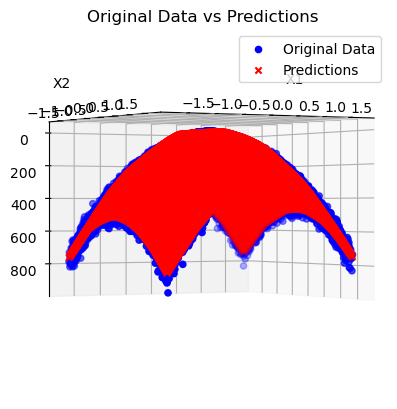

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_original = X[:, :-1]  # Exclude the bias term
predictions = predictions

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original data points
ax.scatter(X_original[:, 0], X_original[:, 1], y[:, 0], c='b', marker='o', label='Original Data')
# Plot predicted data points
ax.scatter(X_original[:, 0], X_original[:, 1], predictions[:, 0], c='r', marker='x', label='Predictions')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Predicted/Original Value')
ax.set_title('Original Data vs Predictions')
elevation = 180  # Elevation angle above the x-y plane (in degrees)
ax.view_init(elev=elevation, azim=None)

plt.legend()
plt.show()
